## Import Libraries

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
from sklearn.cluster import KMeans

# enable In-Line MatPlotLib
%matplotlib inline

# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install boto3
# !{sys.executable} -m pip install pydoop
# !{sys.executable} -m pip install seaborn

## Import Data

In [3]:
hosp = pd.read_csv('AutIntHos-DataSUS-2013-2018.csv',low_memory=False, error_bad_lines=False,sep=';')
estab = pd.read_csv('neoway_estabelecimentos_saude.csv',low_memory=False, sep='|')
obito = pd.read_csv('Obitos-DataSUS-2013-2016.csv', sep=';')
procedimentos = pd.read_csv('Procedimentos-DataSUS-2013-2018.brasil.csv.zip', compression='zip', sep=';', low_memory=False)

## EDA

In [6]:
# estab.columns.values
# obito.columns.values
# procedimentos.columns.values
# hosp.columns.values

# hosp.describe()
# obito.describe()
# procedimentos.describe()
# hosp.columns.describe()

hosp.columns.values

array(['AIH_ID', 'AIH_TIPO', 'PROCESSAMENTO_ANO', 'PROCESSAMENTO_MES',
       'LEITO_TIPO', 'PACIENTE_CEP', 'PACIENTE_MUNICIPIO', 'PACIENTE_UF',
       'PACIENTE_DATA_NASCIMENTO', 'PACIENTE_SEXO', 'UTI_QTD_DIAS',
       'UTI_TIPO', 'DIARIA_INTERMEDIARIA', 'DIARIA_ACOMPANHANTE',
       'DIARIA', 'PROCEDIMENTO_SOLICITADO_ID',
       'PROCEDIMENTO_SOLICITADO_DESC', 'PROCEDIMENTO_REALIZADO_ID',
       'PROCEDIMENTO_REALIZADO_DESC', 'VALOR_SERVICO_HOSPITALAR',
       'VALOR_SERVICO_PROFISSIONAL', 'VALOR_TOTAL', 'VALOR_UTI',
       'INTERNACAO_DATA', 'INTERNACAO_ALTA', 'CID_PRINCIPAL',
       'CID_PRINCIPAL_DESC', 'CID_SECUNDARIA', 'CID_SECUNDARIA_DESC',
       'CID_ASSOCIADA', 'CID_ASSOCIADA_DESC', 'CID_NOTIFICACAO',
       'CID_NOTIFICACAO_DESC', 'CID_MORTE', 'CID_MORTE_DESC',
       'IDADE_MEDIDA', 'IDADE', 'DIAS_PERMANENCIA', 'MORTE',
       'PACIENTE_GRAU_INSTRUCAO', 'GESTANTE_RISCO', 'CNES',
       'CNES_MUNICIPIO', 'CNES_UF', 'CNES_CEP', 'CNES_FANTASIA',
       'INFECCAO_HOSPITALAR', 

In [40]:
cols = ['AIH_ID', 'AIH_TIPO', 'PROCESSAMENTO_ANO', 'PROCESSAMENTO_MES','PACIENTE_UF',
       'PROCEDIMENTO_SOLICITADO_ID',
       'PROCEDIMENTO_SOLICITADO_DESC', 'PROCEDIMENTO_REALIZADO_ID',
       'PROCEDIMENTO_REALIZADO_DESC','VALOR_SERVICO_HOSPITALAR',
       'VALOR_SERVICO_PROFISSIONAL', 'VALOR_TOTAL', 'VALOR_UTI','CID_PRINCIPAL',
       'CID_PRINCIPAL_DESC', 'CID_MORTE', 'CID_MORTE_DESC',
       'DIAS_PERMANENCIA', 'MORTE','CNES',
       'CNES_UF','INFECCAO_HOSPITALAR', 'COMPLEXIDADE', 'PACIENTE_RACA_COR']
hosp = hosp.loc[:,cols]

In [41]:
 hosp.CID_PRINCIPAL.value_counts()[hosp.CID_PRINCIPAL.value_counts()>1000].index

Index(['C509', 'C508', 'C500', 'C501', 'C504', 'C506', 'C503', 'C502', 'C505'], dtype='object')

In [127]:
# hosp.CID_PRINCIPAL.value_counts()[hosp.CID_PRINCIPAL.value_counts()>1000].index
# hosp.CID_PRINCIPAL_DESC.value_counts()[hosp.CID_PRINCIPAL_DESC.value_counts()>1000]

CID_freq = hosp.CID_PRINCIPAL.value_counts()[hosp.CID_PRINCIPAL.value_counts()>1000].index
hosp_mama = hosp[hosp.CID_PRINCIPAL.isin(CID_freq)]
hosp_mama.describe()

,AIH_ID,AIH_TIPO,PROCESSAMENTO_ANO,PROCESSAMENTO_MES,PROCEDIMENTO_SOLICITADO_ID,PROCEDIMENTO_REALIZADO_ID,VALOR_SERVICO_HOSPITALAR,VALOR_SERVICO_PROFISSIONAL,VALOR_TOTAL,VALOR_UTI,DIAS_PERMANENCIA,MORTE,CNES,INFECCAO_HOSPITALAR,COMPLEXIDADE,PACIENTE_RACA_COR
count,3.481160e+05,348116.000000,348116.000000,348116.000000,3.481160e+05,3.481160e+05,348116.000000,348116.000000,348116.000000,348116.000000,348116.000000,348116.000000,1.693820e+05,0.0,348116.000000,348116.000000
mean,3.412794e+12,1.002850,2015.522136,6.402142,3.764172e+08,3.764757e+08,1417.036841,642.443747,2061.016907,50.668694,3.615197,0.083780,1.622647e+06,NaN,2.546186,14.128417
std,7.687194e+11,0.106726,1.660220,3.365467,5.240209e+07,5.245842e+07,1264.118887,628.256753,1846.886525,504.310537,5.484213,0.277057,1.311937e+06,NaN,0.497863,32.231007
min,1.113100e+12,1.000000,2013.000000,1.000000,2.010100e+08,2.010101e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.960000e+02,NaN,2.000000,1.000000
25%,3.113110e+12,1.000000,2014.000000,4.000000,3.041000e+08,3.041000e+08,337.350000,65.200000,434.990000,0.000000,1.000000,0.000000,1.174600e+04,NaN,2.000000,1.000000
50%,3.513101e+12,1.000000,2016.000000,6.000000,4.150100e+08,4.150200e+08,1229.140000,527.320000,1870.360000,0.000000,2.000000,0.000000,2.195453e+06,NaN,3.000000,2.000000
75%,3.518126e+12,1.000000,2017.000000,9.000000,4.160801e+08,4.160801e+08,2050.380000,1100.980000,3125.232500,0.000000,4.000000,0.000000,2.577623e+06,NaN,3.000000,3.000000
max,9.914300e+12,5.000000,2018.000000,12.000000,5.060200e+08,5.060200e+08,33532.030000,11847.060000,41112.410000,28991.910000,307.000000,1.000000,9.388133e+06,NaN,3.000000,99.000000


In [128]:
hosp_mama.head()

,AIH_ID,AIH_TIPO,PROCESSAMENTO_ANO,PROCESSAMENTO_MES,PACIENTE_UF,PROCEDIMENTO_SOLICITADO_ID,PROCEDIMENTO_SOLICITADO_DESC,PROCEDIMENTO_REALIZADO_ID,PROCEDIMENTO_REALIZADO_DESC,VALOR_SERVICO_HOSPITALAR,...,CID_PRINCIPAL_DESC,CID_MORTE,CID_MORTE_DESC,DIAS_PERMANENCIA,MORTE,CNES,CNES_UF,INFECCAO_HOSPITALAR,COMPLEXIDADE,PACIENTE_RACA_COR
0,2913100735424,1,2013,1,BA,410010111,SETORECTOMIA / QUADRANTECTOMIA,410010111,SETORECTOMIA / QUADRANTECTOMIA,233.31,...,C50.0 Mamilo e areola,NaN,NaN,1,0,2772280.0,BA,NaN,2,99
1,2913100736370,1,2013,1,BA,416120024,MASTECTOMIA RADICAL C/ LINFADENECTOMIA AXILAR ...,416120024,MASTECTOMIA RADICAL C/ LINFADENECTOMIA AXILAR ...,1729.72,...,C50.1 Porcao central da mama,NaN,NaN,3,0,2772280.0,BA,NaN,3,99
2,2913100832235,1,2013,1,BA,304100013,TRATAMENTO DE INTERCORRÊNCIAS CLÍNICAS DE PACI...,304100013,TRATAMENTO DE INTERCORRÊNCIAS CLÍNICAS DE PACI...,199.90,...,C50.9 Mama NE,NaN,NaN,4,0,4028155.0,BA,NaN,2,99
3,2912101674350,1,2013,1,BA,410010090,PLASTICA MAMARIA RECONSTRUTIVA - POS MASTECTOM...,410010090,PLASTICA MAMARIA RECONSTRUTIVA - POS MASTECTOM...,175.90,...,C50.8 Lesao invasiva da mama,NaN,NaN,3,0,3816.0,BA,NaN,2,99
4,2912109688257,1,2013,1,BA,304100021,TRATAMENTO CLÍNICO DE PACIENTE ONCOLÓGICO,304100021,TRATAMENTO CLÍNICO DE PACIENTE ONCOLÓGICO,911.04,...,C50.8 Lesao invasiva da mama,J960,J96.0 Insuf respirat aguda,28,1,6211402.0,BA,NaN,2,3


In [129]:
hosp_mama['CNES_UF'].isna().sum()

178734

In [130]:
hosp_mama.loc[:,'CNES_UF'] = hosp_mama['CNES_UF'].fillna(hosp_mama['PACIENTE_UF'])

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [131]:
hosp_mama['CNES_UF'].isna().sum()

0

In [132]:
# hosp_mama[hosp_mama.MORTE == 1].CNES_UF.value_counts()
# hosp_mama[hosp_mama.MORTE == 1].PACIENTE_UF.value_counts()
# hosp_mama[hosp_mama.MORTE == 1].PROCESSAMENTO_ANO.value_counts()
# hosp_mama[hosp_mama.MORTE == 1].COMPLEXIDADE.value_counts()
# hosp_mama[hosp_mama.MORTE == 1].PACIENTE_RACA_COR.value_counts()

cols = ['AIH_ID', 'CNES_UF','CID_PRINCIPAL_DESC', 'VALOR_TOTAL','MORTE']
hosp_mama = hosp_mama.loc[:,cols]

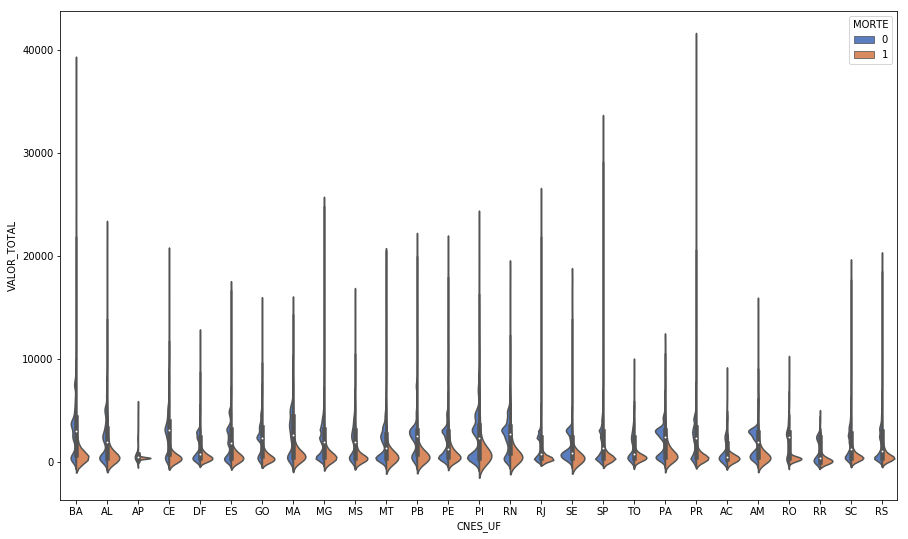

In [133]:
a4_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="CNES_UF", y="VALOR_TOTAL", hue="MORTE",ax=ax,
                    data=hosp_mama, palette="muted", split=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

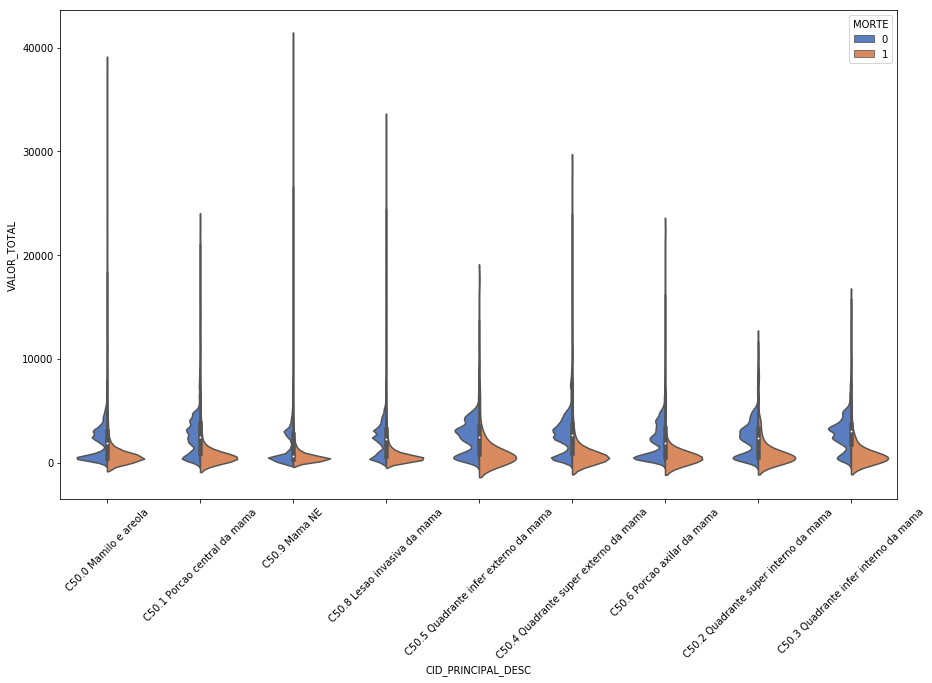

In [139]:
a4_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="CID_PRINCIPAL_DESC", y="VALOR_TOTAL", hue="MORTE",ax=ax,
                    data=hosp_mama, palette="muted", split=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

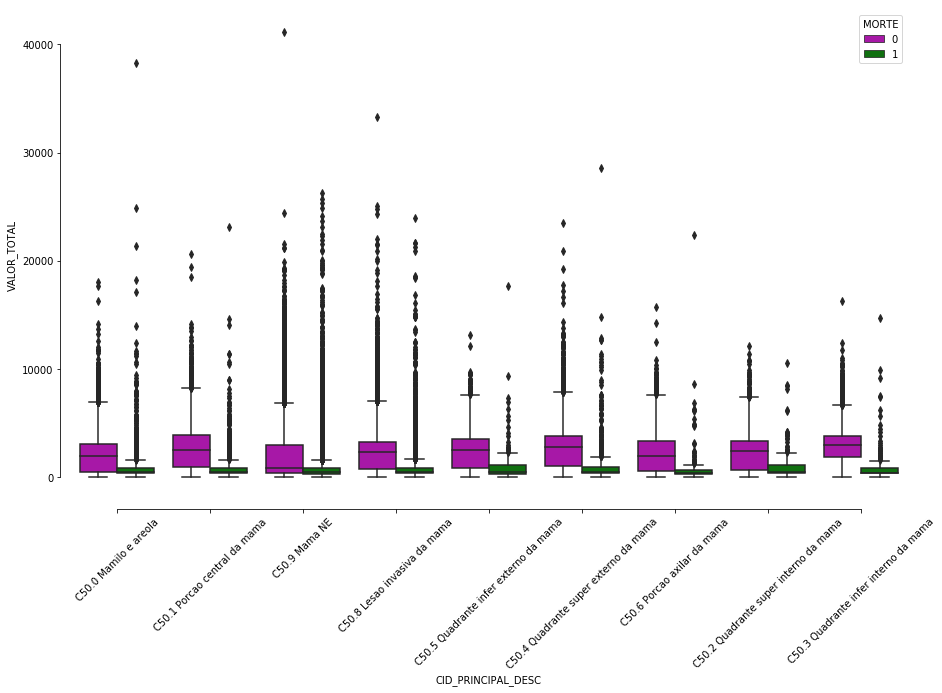

In [143]:
# Draw a nested boxplot to show bills by day and time
a4_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.boxplot(x="CID_PRINCIPAL_DESC", y="VALOR_TOTAL",
            hue="MORTE", palette=["m", "g"],
            data=hosp_mama)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)

In [152]:
hosp_mama.shape

(348116, 5)

In [154]:
l = len(hosp_mama[hosp_mama.VALOR_TOTAL > 2900].VALOR_TOTAL)
sum = hosp_mama[hosp_mama.VALOR_TOTAL > 2900].VALOR_TOTAL.sum()
sum/2900

163548.4292551724

In [155]:
sum/2900/len(hosp_mama)

0.4698101473508038

In [157]:
l/len(hosp_mama)

0.3269226349837411

In [178]:
l = len(hosp_mama[hosp_mama.VALOR_TOTAL > 2900].VALOR_TOTAL)
l1 = hosp_mama[hosp_mama.VALOR_TOTAL > 2900].MORTE.sum()
l0 =l-l1

In [179]:
l1

1524

In [180]:
l0

112283

In [181]:
l

113807

In [185]:
hosp_mama[hosp_mama.VALOR_TOTAL > 2900].MORTE.value_counts()

0    112283
1      1524
Name: MORTE, dtype: int64

In [191]:
1 -1524/(112283+1524)

0.9866089080636516

In [188]:
hosp_mama[hosp_mama.VALOR_TOTAL <= 2900].MORTE.value_counts()

0    206668
1     27641
Name: MORTE, dtype: int64

In [190]:
206668/(27641+206668)

0.8820318468347353